In [1]:
using JLD2, CairoMakie, StatsBase
using Jchemo, JchemoData
using FreqTables

In [2]:
path_jdat = dirname(dirname(pathof(JchemoData)))
db = joinpath(path_jdat, "data/challenge2018.jld2")
@load db dat
pnames(dat)

(:X, :Y)

In [3]:
X = dat.X
Y = dat.Y
ntot, p = size(X)

(4075, 680)

In [4]:
@head X

... (4075, 680)
 


Row,1120,1122,1124,1126,1128,1130,1132,1134,1136,1138,1140,1142,1144,1146,1148,1150,1152,1154,1156,1158,1160,1162,1164,1166,1168,1170,1172,1174,1176,1178,1180,1182,1184,1186,1188,1190,1192,1194,1196,1198,1200,1202,1204,1206,1208,1210,1212,1214,1216,1218,1220,1222,1224,1226,1228,1230,1232,1234,1236,1238,1240,1242,1244,1246,1248,1250,1252,1254,1256,1258,1260,1262,1264,1266,1268,1270,1272,1274,1276,1278,1280,1282,1284,1286,1288,1290,1292,1294,1296,1298,1300,1302,1304,1306,1308,1310,1312,1314,1316,1318,⋯
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,0.597482,0.595978,0.593623,0.59084,0.587451,0.583092,0.578666,0.572134,0.566125,0.560204,0.551694,0.544339,0.537008,0.528312,0.520828,0.51228,0.504673,0.498204,0.48968,0.483176,0.477588,0.470384,0.464844,0.459269,0.454023,0.4496,0.444271,0.440026,0.436514,0.431822,0.428201,0.424881,0.421379,0.41859,0.415556,0.413193,0.411501,0.40946,0.408254,0.407503,0.406948,0.406903,0.407211,0.407941,0.408835,0.410495,0.412211,0.41412,0.416691,0.419178,0.421902,0.424632,0.427036,0.43022,0.432809,0.434996,0.437823,0.439963,0.442041,0.443982,0.445578,0.447395,0.448785,0.449829,0.451165,0.452131,0.453035,0.453898,0.454573,0.455325,0.455932,0.456439,0.45706,0.457588,0.458121,0.458712,0.459253,0.459968,0.460628,0.461245,0.462104,0.462849,0.463604,0.464367,0.464976,0.465614,0.466088,0.466315,0.466568,0.466553,0.466394,0.465981,0.465464,0.464522,0.463511,0.462348,0.460648,0.458807,0.456757,0.454314,⋯
2,0.954192,0.953237,0.952002,0.950426,0.948382,0.946138,0.943543,0.94057,0.937514,0.934336,0.931181,0.92803,0.924979,0.922076,0.919204,0.916252,0.913228,0.91006,0.906591,0.902934,0.899069,0.894974,0.890786,0.886513,0.882297,0.878178,0.874064,0.870132,0.866404,0.862724,0.859357,0.856211,0.853359,0.850962,0.848901,0.84742,0.846361,0.845615,0.845178,0.845054,0.845031,0.845245,0.845549,0.845977,0.846463,0.847118,0.847808,0.848598,0.849367,0.850203,0.851115,0.85195,0.852774,0.853623,0.854617,0.855511,0.856426,0.857282,0.858228,0.859145,0.860036,0.860869,0.861774,0.862626,0.863431,0.864185,0.864786,0.865254,0.865612,0.865936,0.866131,0.866294,0.8663,0.866269,0.86628,0.866326,0.866443,0.866614,0.866967,0.867366,0.867852,0.868533,0.869212,0.869894,0.870584,0.871296,0.872008,0.872612,0.873183,0.873633,0.874032,0.874337,0.87455,0.87461,0.874656,0.874554,0.87432,0.873982,0.873513,0.872882,⋯
3,0.611137,0.609566,0.60743,0.604767,0.601434,0.597316,0.592598,0.586992,0.580741,0.574189,0.566943,0.559381,0.551773,0.543753,0.535977,0.52818,0.520482,0.513455,0.506598,0.500236,0.494469,0.488922,0.483579,0.478512,0.473364,0.468619,0.463914,0.459365,0.455331,0.451357,0.447738,0.444393,0.4412,0.43831,0.435652,0.433147,0.431142,0.429417,0.428137,0.427358,0.427051,0.427196,0.427831,0.428873,0.43028,0.432035,0.434176,0.436401,0.438986,0.441528,0.444208,0.446958,0.449588,0.452339,0.455044,0.457599,0.460146,0.462568,0.464761,0.466901,0.468719,0.47045,0.472001,0.473309,0.47453,0.475624,0.476567,0.477469,0.478218,0.478939,0.479589,0.480172,0.480771,0.481325,0.48187,0.482473,0.483049,0.483702,0.484401,0.485088,0.485835,0.486543,0.487239,0.487919,0.488478,0.488971,0.489365,0.489597,0.489697,0.48958,0.489309,0.488807,0.488128,0.487165,0.485927,0.484502,0.48277,0.480747,0.47851,0.475817,⋯


In [5]:
@head Y

... (4075, 4)
 


Row,typ,label,conc,test
,String,String,Float64,Int64
1,FRG,wheat (ung),12.74,0
2,MPW,milk powder & whey,35.7212,0
3,FRG,wheat (ung),12.0,0


In [6]:
summ(Y)

(res = 4×7 DataFrame
 Row │ variable  mean    std     min          max          n      nmissing 
     │ Symbol    Union…  Union…  Any          Any          Int64  Int64    
─────┼─────────────────────────────────────────────────────────────────────
   1 │ typ                       ANF          TTS           4075         0
   2 │ label                     animal feed  wheat (ung)   4075         0
   3 │ conc      31.93   20.348  2.766        76.604        4075         0
   4 │ test      0.092   0.289   0            1             4075         0, ntot = 4075)

In [7]:
y = Y.conc
typ = Y.typ
label = Y.label
test = Y.test
tab(test)

OrderedCollections.OrderedDict{Int64, Int64} with 2 entries:
  0 => 3701
  1 => 374

In [8]:
wl = names(X)
wl_num = parse.(Float64, wl)

680-element Vector{Float64}:
 1120.0
 1122.0
 1124.0
 1126.0
 1128.0
 1130.0
 1132.0
 1134.0
 1136.0
 1138.0
    ⋮
 2462.0
 2464.0
 2466.0
 2468.0
 2470.0
 2472.0
 2474.0
 2476.0
 2478.0

In [9]:
lev = unique(typ)
nlev = length(lev)

10

In [10]:
freqtable(string.(typ, "-", Y.label))

10-element Named Vector{Int64}
Dim1                    │ 
────────────────────────┼────
ANF-animal feed         │ 391
CLZ-rapeseed(ung)       │ 420
CNG-corn gluten         │ 395
EHH-grass silage        │ 422
FFS-full fat soya       │ 432
FRG-wheat (ung)         │ 411
MPW-milk powder & whey  │ 410
PEE-maize wp            │ 407
SFG-sun flower seed(gr) │ 281
TTS-soya meal           │ 506

In [11]:
freqtable(typ, test)

10×2 Named Matrix{Int64}
Dim1 ╲ Dim2 │   0    1
────────────┼─────────
ANF         │ 351   40
CLZ         │ 378   42
CNG         │ 356   39
EHH         │ 380   42
FFS         │ 397   35
FRG         │ 371   40
MPW         │ 372   38
PEE         │ 367   40
SFG         │ 272    9
TTS         │ 457   49

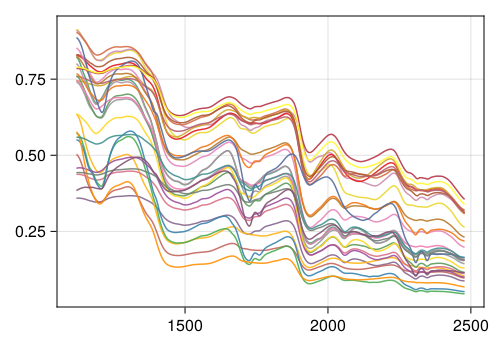

In [12]:
plotsp(X, wl_num; nsamp = 30).f

In [13]:
f = 21 ; pol = 3 ; d = 2
Xp = savgol(snv(X); f = f, pol = pol, d = d) ;

plotsp(Xp, wl_num; nsamp = 30).f

# Tot = Train + Test
s = Bool.(test)
Xtrain = rmrow(Xp, s)
Ytrain = rmrow(Y, s)
ytrain = rmrow(y, s)
Xtest = Xp[s, :]
Ytest = Y[s, :]
ytest = y[s]
ntrain = nro(Xtrain)
ntest = nro(Xtest)
(ntot = ntot, ntrain, ntest)

(ntot = 4075, ntrain = 3701, ntest = 374)

In [14]:
# PCAs on X
fm = pcasvd(Xp, nlv = 15) ;
pnames(fm)
T = fm.T

4075×15 Matrix{Float64}:
  0.000913716   0.017632      0.00197272   …  -5.44267e-5    0.000159407
  0.0121126    -0.000587014   0.00498767      -0.000284795  -0.000659534
  0.000228585   0.0183747    -0.000928365      0.000124141   0.000126047
 -0.0248327    -0.0175559    -0.00181017      -0.00086066    0.000768278
  0.00626101   -0.00652196   -0.000621379     -0.00021389   -0.000935445
 -0.027378     -0.00524849    0.0110923    …  -0.000580875   0.00180317
  0.00898173   -5.90755e-5    0.00542315      -0.000307952   0.000715353
  0.00656574   -0.00265549    0.00442992       3.78127e-6    0.000578888
  0.00650383    0.0044295    -0.00744792       0.000667341   0.000216944
  0.010248     -0.00989945    0.00525126       0.00032831   -0.000708097
  ⋮                                        ⋱                
  0.00703117   -0.000531991  -0.0098978       -0.000372485  -0.000760524
 -0.000250256  -0.00579272   -0.00527217      -9.73412e-5    0.000285382
  0.0066455     0.00267007   -0.0059669

In [15]:
res = summary(fm, Xp) ;
pnames(res)

(:explvarx, :contr_ind, :contr_var, :coord_var, :cor_circle)

In [16]:
z = res.explvarx

Row,lv,var,pvar,cumpvar
,Int64,Float64,Float64,Float64
1,1,0.000103169,0.353932,0.353932
2,2,9.28027e-5,0.318371,0.672304
3,3,3.98784e-5,0.136808,0.809111
4,4,2.33726e-5,0.0801824,0.889294
5,5,1.10464e-5,0.0378959,0.92719
6,6,5.73284e-6,0.0196672,0.946857
7,7,3.62347e-6,0.0124307,0.959288
8,8,2.88338e-6,0.00989178,0.969179
9,9,2.69486e-6,0.00924505,0.978424


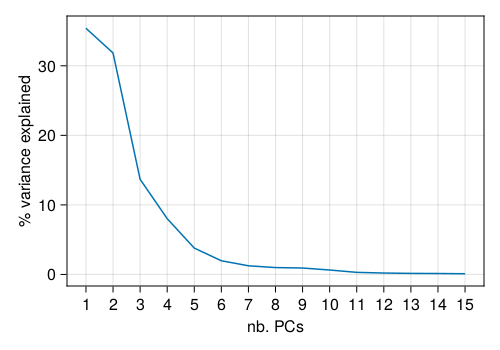

In [17]:
plotgrid(z.lv, 100 * z.pvar; step = 1,
    xlabel = "nb. PCs", ylabel = "% variance explained").f

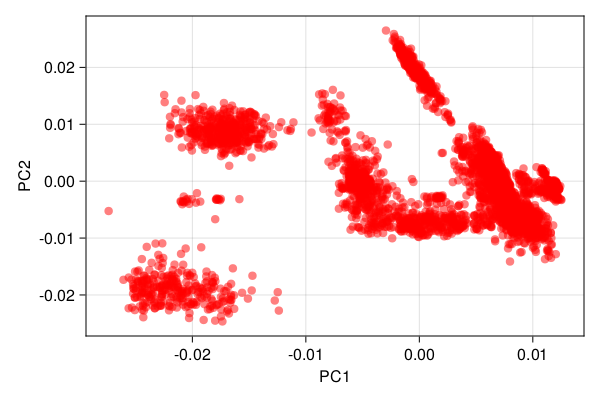

In [18]:
i = 1
plotxy(T[:, i:(i + 1)]; color = (:red, .5),
    xlabel = string("PC", i), ylabel = string("PC", i + 1)).f

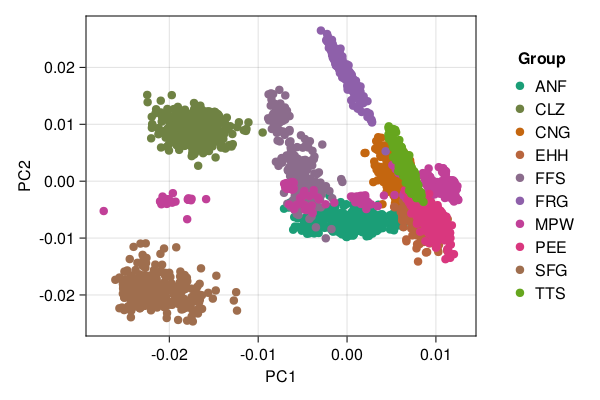

In [19]:
colm = cgrad(:Dark2_5, nlev; categorical = true)
plotxy(T[:, i:(i + 1)], typ; color = colm,
    xlabel = string("PC", i), ylabel = string("PC", i + 1)).f

In [20]:
# Train vs Test
fm = pcasvd(Xtrain, nlv = 15) ;

In [21]:
Ttrain = fm.T
@head Ttrain

... (3701, 15)
 


3×15 Matrix{Float64}:
 -0.00444931   0.0171604    0.00192674   …  -9.09844e-5    0.000153014
 -0.0119228   -0.00286706   0.00500189      -0.000282449  -0.000705488
 -0.00391203   0.0180218   -0.000975336      0.0001161     0.000142068

In [22]:
Ttest = Jchemo.transform(fm, Xtest)
@head Ttest

... (374, 15)
 


3×15 Matrix{Float64}:
  0.0126087    0.0102876    0.00597325  …  6.27455e-5    0.000457277
 -0.00690901  -0.00507066   0.00472288     6.44318e-5    0.000224109
 -0.00284267   0.0236669   -7.55497e-5     0.000421497  -0.000256519

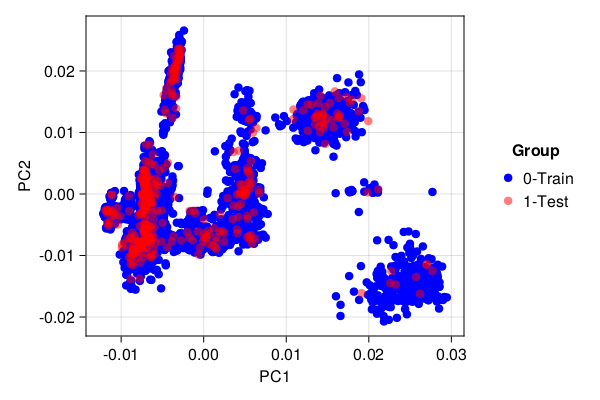

In [23]:
zT = vcat(Ttrain, Ttest)
group = vcat(repeat(["0-Train";], ntrain),
    repeat(["1-Test";], ntest))
colm = [:blue, (:red, .5)]
i = 1
plotxy(zT[:, i:(i + 1)], group; color = colm,
    xlabel = "PC1", ylabel = "PC2").f

In [24]:
res_sd = occsd(fm) ;
sdtrain = res_sd.d
sdtest = Jchemo.predict(res_sd, Xtest).d

Row,d,dstand,pval,gh
,Float64,Float64,Float64,Float64
1,4.0264,0.651352,0.296677,1.08079
2,3.33244,0.53909,0.526614,0.740346
3,3.97524,0.643076,0.307755,1.0535
4,3.61575,0.584921,0.414483,0.871577
5,5.69029,0.920519,0.0702513,2.15863
6,3.46146,0.559962,0.472845,0.798783
7,3.6744,0.594409,0.395299,0.900082
8,2.60613,0.421594,0.857336,0.452795
9,3.92332,0.634677,0.318833,1.02617


In [25]:
res_od = occod(fm, Xtrain) ;
odtrain = res_od.d
odtest = Jchemo.predict(res_od, Xtest).d

Row,d,dstand,pval
,Float64,Float64,Float64
1,0.0011638,0.452687,0.483383
2,0.00140561,0.546746,0.305593
3,0.0013676,0.531958,0.330451
4,0.00149364,0.580988,0.255877
5,0.00234244,0.911147,0.0440422
6,0.00101025,0.392961,0.607403
7,0.00256967,0.999532,0.0245879
8,0.00139732,0.543519,0.310186
9,0.00202409,0.787318,0.0902459


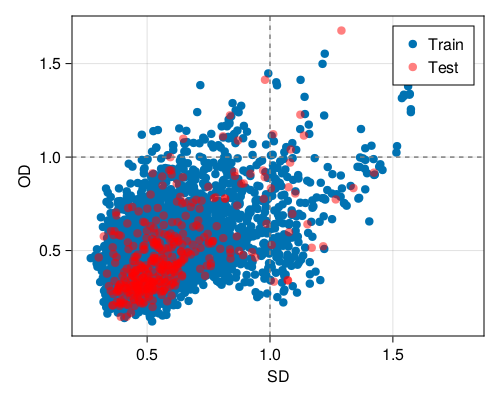

In [26]:
f = Figure(resolution = (500, 400))
ax = Axis(f, xlabel = "SD", ylabel = "OD")
scatter!(ax, sdtrain.dstand, odtrain.dstand,
    label = "Train")
scatter!(ax, sdtest.dstand, odtest.dstand,
    color = (:red, .5), label = "Test")
hlines!(ax, 1; color = :grey, linestyle = "-")
vlines!(ax, 1; color = :grey, linestyle = "-")
axislegend(position = :rt)
f[1, 1] = ax
f

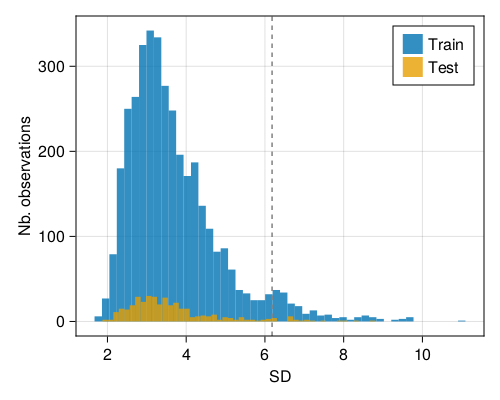

In [27]:
zres = res_sd ; nam = "SD"
#zres = res_od ; nam = "OD"
sdtrain = zres.d
sdtest = Jchemo.predict(zres, Xtest).d
f = Figure(resolution = (500, 400))
ax = Axis(f[1, 1], xlabel = nam, ylabel = "Nb. observations")
hist!(ax, sdtrain.d; bins = 50, label = "Train")
hist!(ax, sdtest.d; bins = 50, label = "Test")
vlines!(ax, zres.cutoff; color = :grey, linestyle = "-")
axislegend(position = :rt)
f

In [28]:
# Variable y
summ(y)

(res = 1×7 DataFrame
 Row │ variable  mean     std      min      max      n      nmissing 
     │ Symbol    Float64  Float64  Float64  Float64  Int64  Int64    
─────┼───────────────────────────────────────────────────────────────
   1 │ x1          31.93   20.348    2.766   76.604   4075         0, ntot = 4075)

In [29]:
summ(y, test)

Group: 0
1×7 DataFrame
 Row │ variable  mean     std      min      max      n      nmissing
     │ Symbol    Float64  Float64  Float64  Float64  Int64  Int64
─────┼───────────────────────────────────────────────────────────────
   1 │ x1         31.894   20.297    3.061   76.604   3701         0


Group: 1
1×7 DataFrame
 Row │ variable  mean     std      min      max      n      nmissing
     │ Symbol    Float64  Float64  Float64  Float64  Int64  Int64
─────┼───────────────────────────────────────────────────────────────
   1 │ x1         32.288   20.874    2.766  75.8559    374         0




In [30]:
aggstat(y, test).X

2×1 Matrix{Float64}:
 31.894288458659823
 32.28762753101604

In [31]:
aggstat(Y; vars = :conc, groups = :test)

Row,test,conc
,Int64,Float64
1,0,31.8943
2,1,32.2876


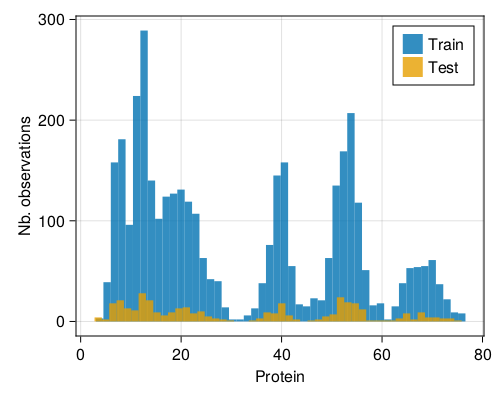

In [32]:
f = Figure(resolution = (500, 400))
ax = Axis(f[1, 1], xlabel = "Protein", ylabel = "Nb. observations")
hist!(ax, ytrain; bins = 50, label = "Train")
hist!(ax, ytest; bins = 50, label = "Test")
axislegend(position = :rt)
f

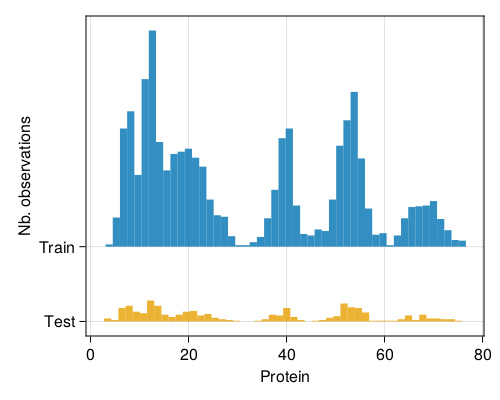

In [33]:
f = Figure(resolution = (500, 400))
offs = [100; 0]
ax = Axis(f[1, 1], xlabel = "Protein",
    ylabel = "Nb. observations",
    yticks = (offs, ["Train" ; "Test"]))
hist!(ax, ytrain; offset = offs[1], bins = 50)
hist!(ax, ytest; offset = offs[2], bins = 50)
f

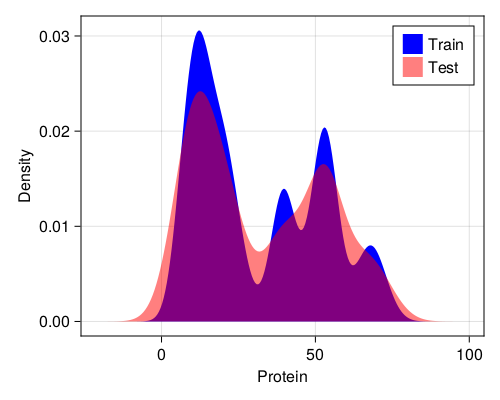

In [34]:
f = Figure(resolution = (500, 400))
ax = Axis(f[1, 1], xlabel = "Protein", ylabel = "Density")
density!(ax, ytrain; color = :blue, label = "Train")
density!(ax, ytest; color = (:red, .5), label = "Test")
axislegend(position = :rt)
f

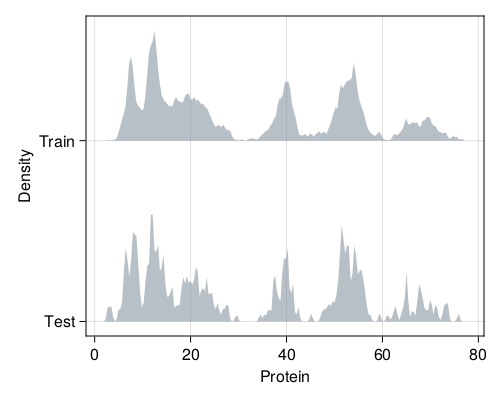

In [35]:
f = Figure(resolution = (500, 400))
offs = [.1; 0]
ax = Axis(f[1, 1], xlabel = "Protein", ylabel = "Density",
    yticks = (offs, ["Train" ; "Test"]))
density!(ax, ytrain; offset = offs[1], color = (:slategray, 0.5),
    bandwidth = 0.2)
density!(ax, ytest; offset = offs[2], color = (:slategray, 0.5),
    bandwidth = 0.2)
f

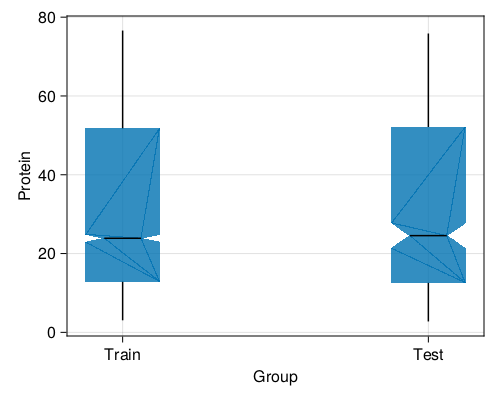

In [36]:
f = Figure(resolution = (500, 400))
ax = Axis(f[1, 1],
    xticks = (0:1, ["Train", "Test"]),
    xlabel = "Group", ylabel = "Protein")
boxplot!(ax, test, y; width = .3,
    show_notch = true)
f

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*